In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
tennis = pd.read_csv('ID3_dataset.csv')

In [3]:
X=tennis.iloc[:,0:4]
y=tennis.iloc[:,4:5]
print(X)
print(y)


     outlook temperature humidity    wind
0      sunny         hot     high    weak
1      sunny         hot     high  strong
2   overcast         hot     high    weak
3       rain        mild     high    weak
4       rain        cool   normal    weak
5       rain        cool   normal  strong
6   overcast        cool   normal  strong
7      sunny        mild     high    weak
8      sunny        cool   normal    weak
9       rain        mild   normal    weak
10     sunny        mild   normal  strong
11  overcast        mild     high  strong
12  overcast         hot   normal    weak
13      rain        mild     high  strong
   play
0    no
1    no
2   yes
3   yes
4   yes
5    no
6   yes
7    no
8   yes
9   yes
10  yes
11  yes
12  yes
13   no


In [4]:
#Data Cleaning
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
ordinal_encoder = OrdinalEncoder()
label_encode = LabelEncoder()
X_ordinal_encoded= ordinal_encoder.fit_transform(X) 
print("features")
print(X_ordinal_encoded)
print("Target")
y_label_encoded = label_encode.fit_transform(y.values.ravel())
print(y_label_encoded)

features
[[2. 1. 0. 1.]
 [2. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 2. 0. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [2. 2. 0. 1.]
 [2. 0. 1. 1.]
 [1. 2. 1. 1.]
 [2. 2. 1. 0.]
 [0. 2. 0. 0.]
 [0. 1. 1. 1.]
 [1. 2. 0. 0.]]
Target
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [5]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy',max_depth=2, random_state=100)
clf = tree_clf.fit(X_ordinal_encoded,y_label_encoded)

[Text(0.4, 0.8333333333333334, 'Outlook <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = yes'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = yes'),
 Text(0.6, 0.5, 'Humidity <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = no'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = no'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = yes')]

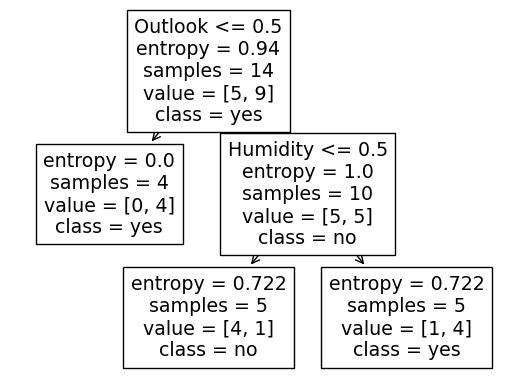

In [6]:
from sklearn import tree
tree.plot_tree(clf,feature_names=['Outlook','Temprature','Humidity','Wind'],class_names=['no','yes'])

In [7]:
print( tree_clf.predict_proba([[2,2,0,1]]) )

[[0.8 0.2]]


In [8]:
otp = tree_clf.predict([[2,2,0,1]])
print(label_encode.inverse_transform(otp))

['no']
